## Imports

In [96]:
from __future__ import annotations

import os
import uuid
import time
import random; random.seed(42)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageColor
import cv2

import tensorflow as tf
from tensorflow import keras

device = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(device, True)

## Helper Functions & Classes

In [ ]:
class ImageDatasetFolder:
    def __init__(self, folderpath: os.PathLike, annotations_path: os.PathLike) -> None:
        self._folderpath = folderpath
        self._annotations_path = annotations_path



## Load Dataset

In [118]:
# concat all annotation files
dataset_annotations = pd.concat([
    pd.read_csv('./data/train/_annotations.csv').assign(set=['train'] * 3324),
    pd.read_csv('./data/test/_annotations.csv').assign(set=['test'] * 584),
    pd.read_csv('./data/valid/_annotations.csv').assign(set=['valid'] * 909),
])
display(dataset_annotations.head())

# get all image classes
classes, n_classes = dataset_annotations['class'].unique().tolist(), len(dataset_annotations['class'].unique())

random.seed(42)
colours = random.sample(list(ImageColor.colormap.values()), n_classes)

,filename,width,height,class,xmin,ymin,xmax,ymax,set
0,IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...,768,1024,starfish,302,410,534,730,train
1,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,shark,106,442,175,640,train
2,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,fish,638,490,678,672,train
3,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,fish,625,107,765,187,train
4,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...,1024,768,fish,818,419,830,499,train


## Label Image Dataset

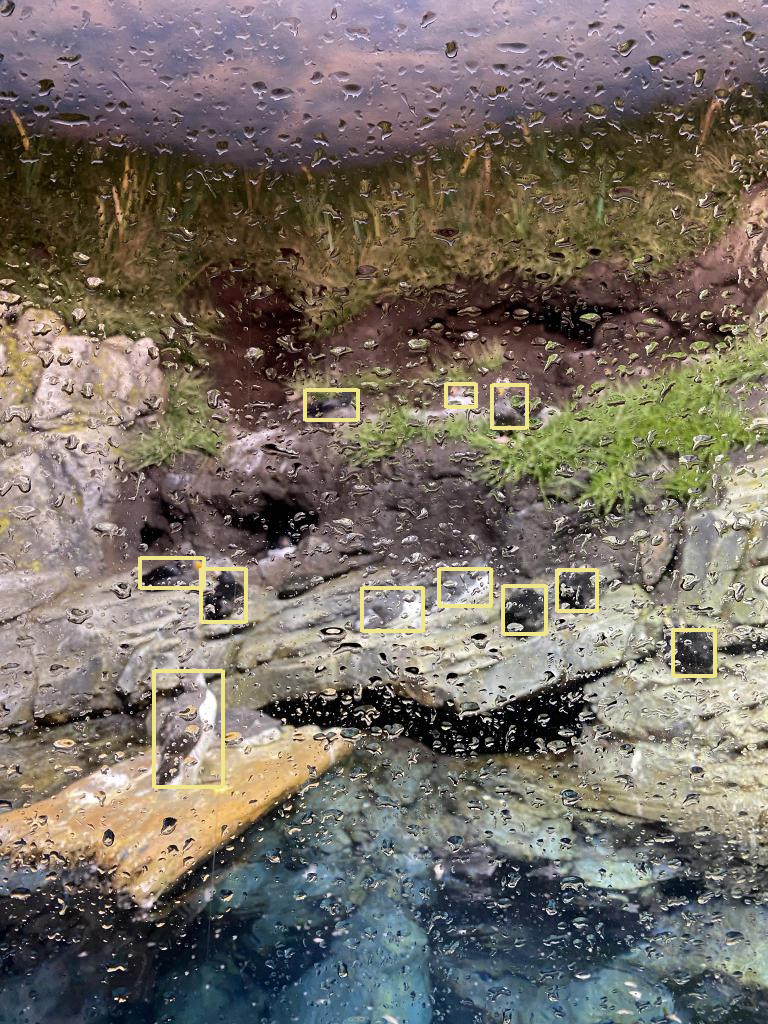

In [120]:
# draw bounding boxes for classes within images
for filename in dataset_annotations['filename'].unique():
    img_subdf = dataset_annotations.loc[dataset_annotations['filename'] == filename]

    # open image as PIL Image
    img = Image.open(f'./data/{img_subdf["set"].values[0]}/{filename}')
    img_draw = ImageDraw.Draw(img)
    img_width, img_height = img.size

    # for each class in the image
    for i, row in img_subdf.iterrows():
        xmin, xmax = row['xmin'], row['xmax']
        ymin, ymax = row['ymin'], row['ymax']
        
        # draw bounding box for class
        img_draw.line([(xmin, ymin),
                       (xmax, ymin),
                       (xmax, ymax),
                       (xmin, ymax),
                       (xmin, ymin)], width=4, fill=colours[classes.index(img_subdf['class'].values[0])])

display(img)